## Download a dataset from kaggle

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
dataset_url = 'https://www.kaggle.com/abhinand05/crop-production-in-india/crop_production.csv'

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\crop-production-in-india" (use force=True to force download)


In [4]:
data_dir = './crop-production-in-india'

### Importing Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Loading Dataset

In [6]:
file_path = "./crop-production-in-india/crop_production.csv"
data=pd.read_csv(file_path ) #loading the csv File to dataset

### Data Inspection

In [7]:
# Preview the first few rows of a Data & names of the columns.
data.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [8]:
# Getting an overview of the data and identifying any potential issues.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


* As you can see, There are 246091 rows in all columns except in production that means missing valus inproduction column, there are Six colums total out of which- two columns with float values, one column with integer values, and four columns with object type values. 

### Perform Exploratory Data Analysis

In [9]:
# Check the count of null values among the dataset
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [10]:
data.isnull().sum()* 100 / len(data)

State_Name       0.000000
District_Name    0.000000
Crop_Year        0.000000
Season           0.000000
Crop             0.000000
Area             0.000000
Production       1.515699
dtype: float64

So here percentage of null values for production column is very less so the rows containing null values can be dropped.

In [11]:
data.dropna(subset=["Production"],axis=0,inplace=True) #droppinng the null values in production column.

In [12]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

### Handling duplicates

In [13]:
data.duplicated().sum() #calculalting the total duplicate values

0

* Here you can see the no duplicate rows in the dataset.

### Unique Values: Unique values refer to the distinct categories or entries within a variable.

In [14]:
for i in data.columns:
    print(f'The number of unique values in {i}:', data[i].nunique())

The number of unique values in State_Name: 33
The number of unique values in District_Name: 646
The number of unique values in Crop_Year: 19
The number of unique values in Season: 6
The number of unique values in Crop: 124
The number of unique values in Area: 38391
The number of unique values in Production: 51627


In [15]:
value_counts = {col: data[col].value_counts() for col in data.columns}
value_counts

{'State_Name': State_Name
 Uttar Pradesh                  33189
 Madhya Pradesh                 22604
 Karnataka                      21079
 Bihar                          18874
 Assam                          14622
 Odisha                         13524
 Tamil Nadu                     13266
 Maharashtra                    12496
 Rajasthan                      12066
 Chhattisgarh                   10368
 West Bengal                     9597
 Andhra Pradesh                  9561
 Gujarat                         8365
 Telangana                       5591
 Uttarakhand                     4825
 Haryana                         4540
 Kerala                          4003
 Nagaland                        3904
 Punjab                          3143
 Meghalaya                       2867
 Arunachal Pradesh               2545
 Himachal Pradesh                2456
 Jammu and Kashmir               1632
 Tripura                         1412
 Manipur                         1266
 Jharkhand              

<Axes: xlabel='State_Name', ylabel='count'>

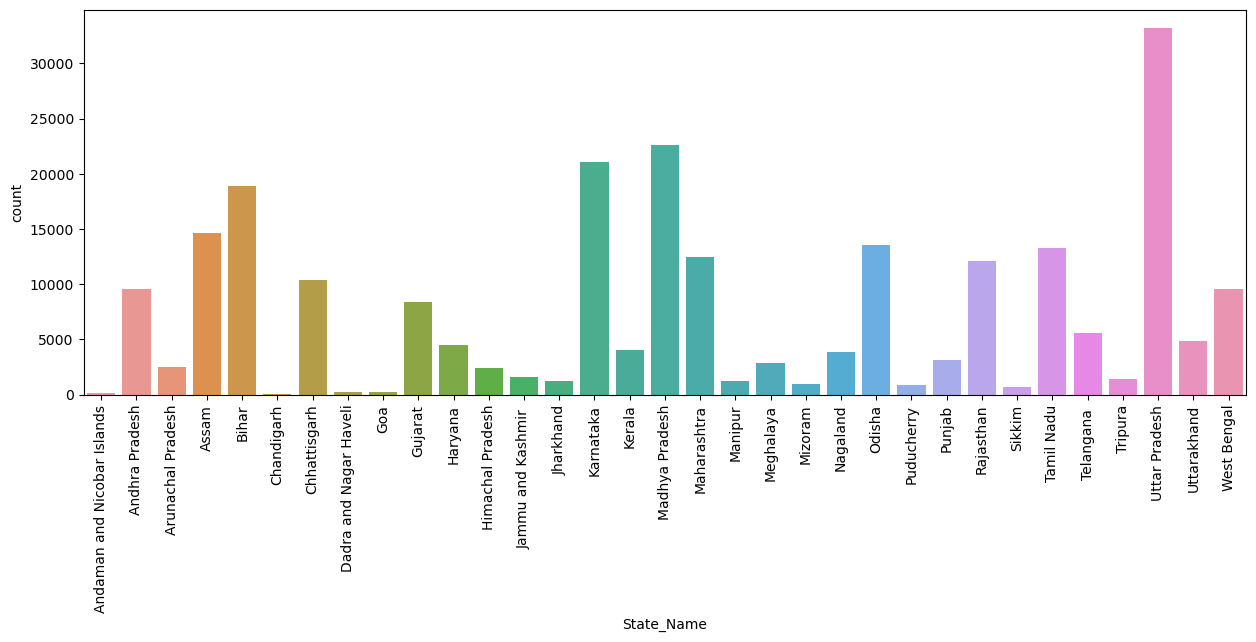

In [16]:
plt.figure(figsize=(15,5))
plt.tick_params(labelsize=10)
plt.xticks(rotation=90)
sns.countplot(x=data['State_Name'])

* UP,MP and Karnata as a heigest count of data 

<Axes: xlabel='Crop_Year', ylabel='Count'>

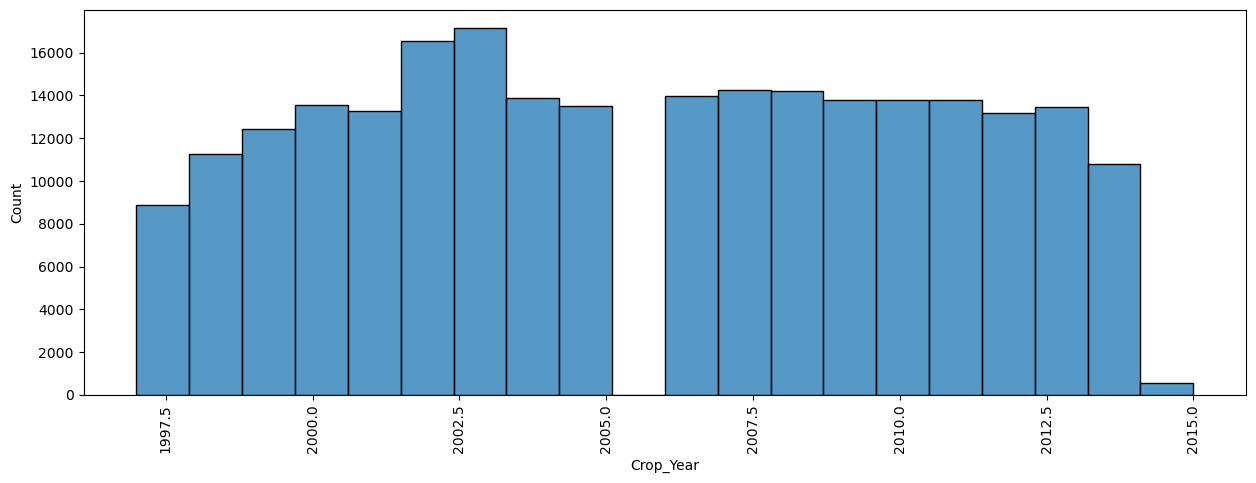

In [17]:
plt.figure(figsize=(15,5))
plt.tick_params(labelsize=10)
plt.xticks(rotation=90)
sns.histplot(x=data['Crop_Year'], bins=20, kde=False)

* The range of crop years is from 1997 to 2015. 2002 and 2003 as heigest count of data

<Axes: xlabel='Season', ylabel='count'>

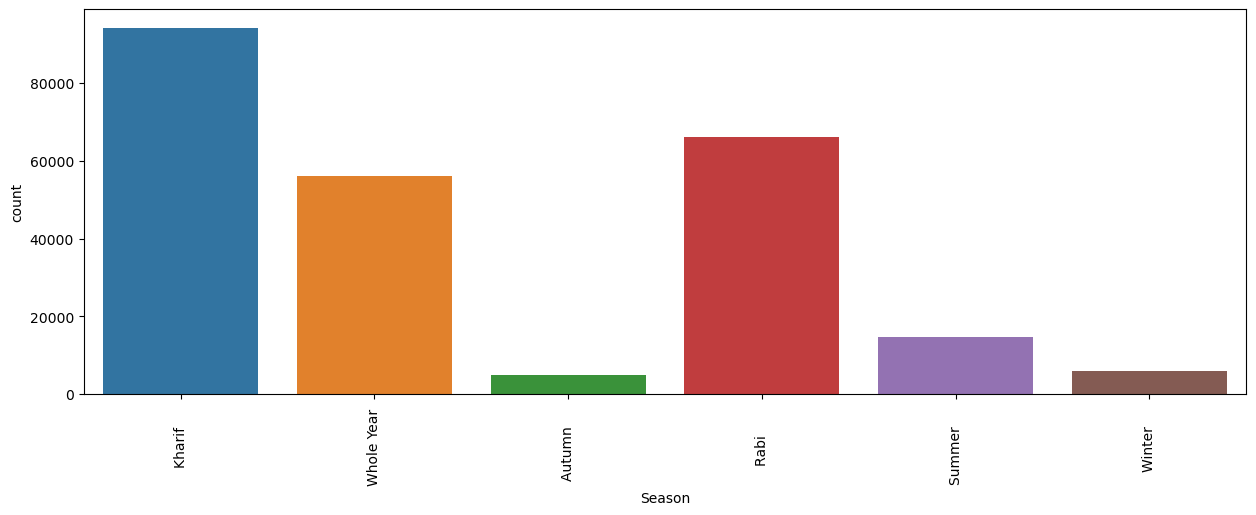

In [18]:
plt.figure(figsize=(15,5))
plt.tick_params(labelsize=10)
plt.xticks(rotation=90)
sns.countplot(x=data['Season'])

* As Kharif is a growing season it as a large number of data followed by Rabi

In [19]:
data['District_Name'].value_counts(ascending=False).head(10)

District_Name
TUMKUR            931
BELGAUM           924
BIJAPUR           905
HASSAN            895
BELLARY           887
DAVANGERE         881
AURANGABAD        870
HAVERI            867
CHAMARAJANAGAR    841
CHITRADURGA       840
Name: count, dtype: int64

* Tumkur, Belgaum, Bijapur, Hassan, Bellary from Karnata State as a heigest number of data points

In [20]:
data['Crop'].value_counts(ascending=False).head(10)

Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Groundnut             8770
Wheat                 7878
Sugarcane             7827
Rapeseed &Mustard     7533
Arhar/Tur             7476
Name: count, dtype: int64

In [21]:
data['Production'].describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

In [22]:
print(data['Production'].skew())
print(data['Production'].kurtosis())

40.74153975191237
1882.113472224137


* Both Area and Production are positively skewed and More outliers are expected compared to a normal distribution.

<Axes: xlabel='Production'>

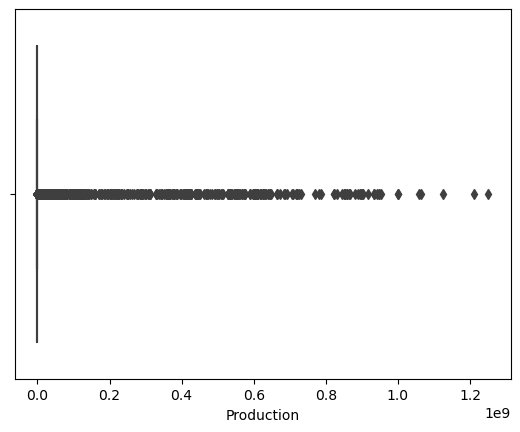

In [23]:
sns.boxplot(x=data['Production'])

In [24]:
data['Area'].describe()

count    2.423610e+05
mean     1.216741e+04
std      5.085744e+04
min      1.000000e-01
25%      8.700000e+01
50%      6.030000e+02
75%      4.545000e+03
max      8.580100e+06
Name: Area, dtype: float64

In [25]:
print(data['Area'].skew())
print(data['Area'].kurtosis())

47.76912084929028
5506.287221366088


<Axes: xlabel='Area'>

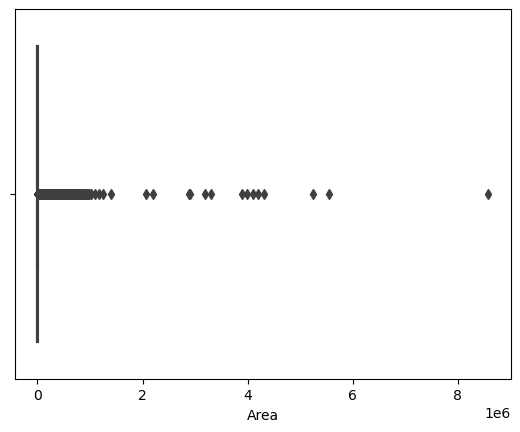

In [26]:
sns.boxplot(x=data['Area'])

### Analyze Relationships : Examine relationships with other variables.

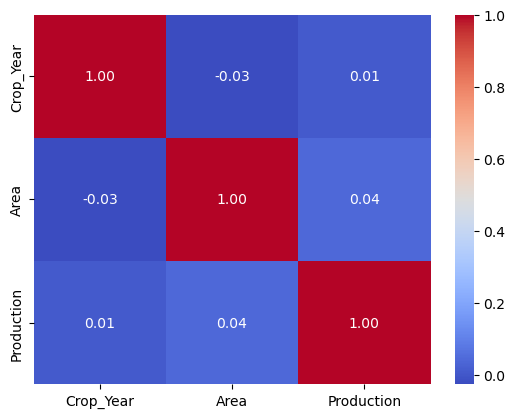

In [27]:
numeric_data = data._get_numeric_data()
corr_matrix = numeric_data.corr()
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

### Bivarate Analysis

## State wise production

In [28]:
state_wise_prod_data = Prod = data.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
state_wise_prod_data

,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


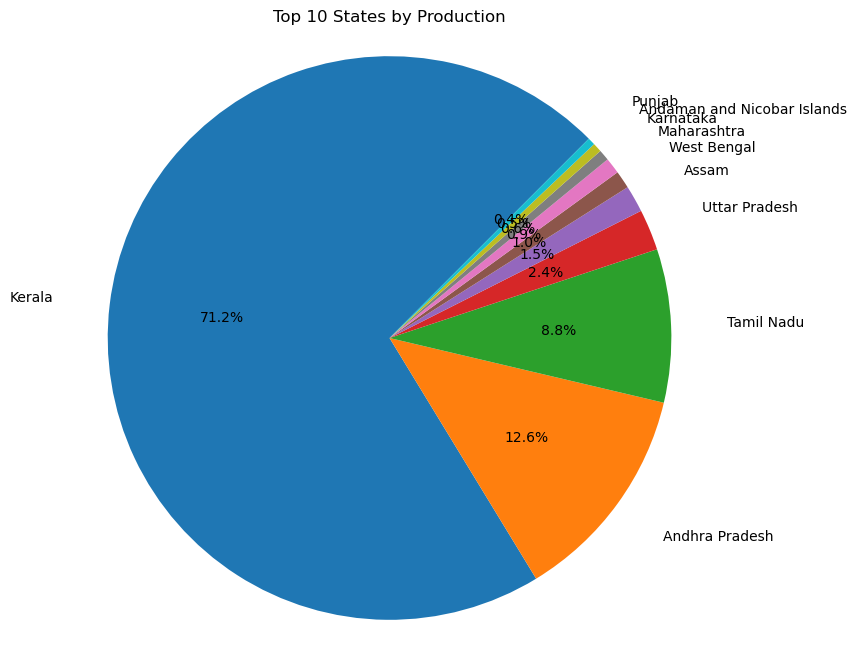

In [29]:
plt.figure(figsize=(8, 8))
plt.pie(state_wise_prod_data['Production'], labels=state_wise_prod_data['State_Name'], autopct='%1.1f%%', startangle=45, labeldistance=1.2)
plt.title('Top 10 States by Production')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

* Kerala as a highest crop production followed by Andra Pradesh 

## Crop Wise Production

In [30]:
crop_wise_prod_data = data.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop_wise_prod_data

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08
33,Cotton(lint),2.970000e+08
59,Maize,2.733418e+08
49,Jute,1.815582e+08
7,Banana,1.461327e+08
105,Soyabean,1.418372e+08


* Coconut as a highest crop production, as the weight of the coconut weighs more followed by Sugarcane

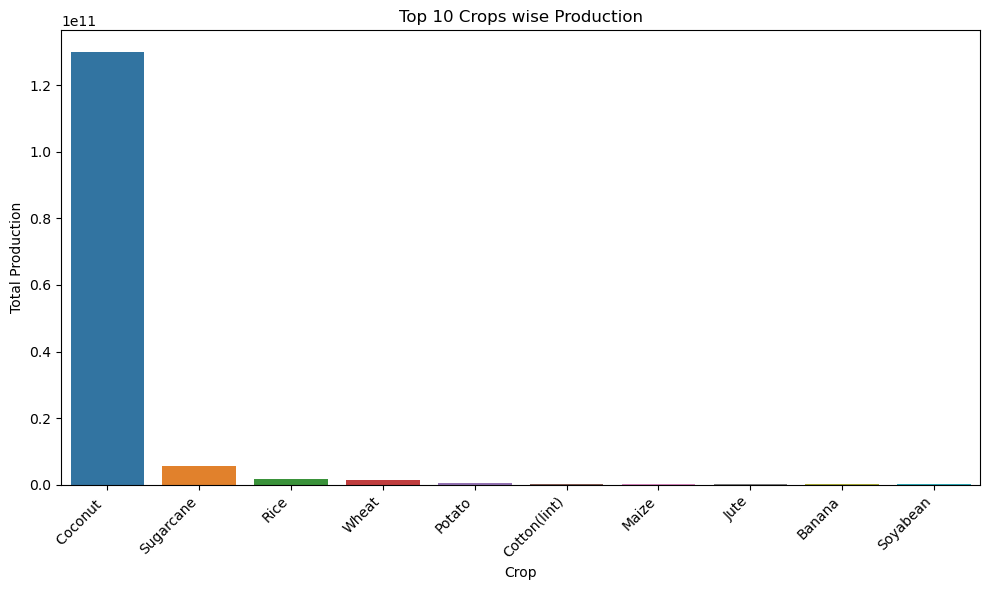

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Crop', y='Production', data=crop_wise_prod_data)
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.title('Top 10 Crops wise Production')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Year Wise Production

In [32]:
year_wise_prod = data.groupby(by='Crop_Year')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
year_wise_prod

,Crop_Year,Production
14,2011,1.430890e+10
16,2013,1.290359e+10
9,2006,8.681913e+09
17,2014,8.664541e+09
7,2004,8.189462e+09
15,2012,8.171055e+09
8,2005,8.043757e+09
6,2003,7.917974e+09
11,2008,7.717018e+09
5,2002,7.696955e+09


* 2011 as highest production followed by 2013

<Axes: xlabel='Crop_Year'>

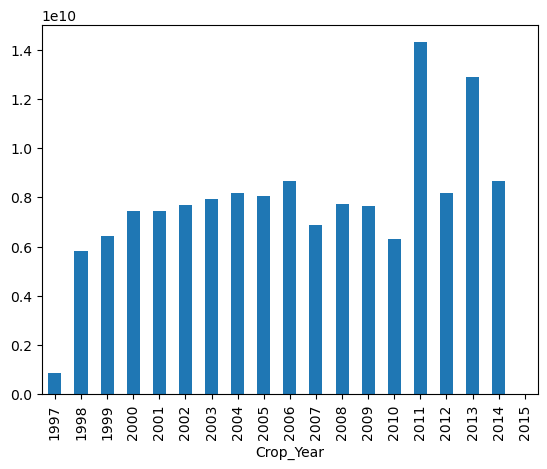

In [33]:
data.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

## State wise area of crop grown

In [34]:
state_wise_area = data.groupby(by='State_Name')['Area'].sum().reset_index().sort_values(by='Area', ascending=False).head(10)
state_wise_area

,State_Name,Area
30,Uttar Pradesh,4.336223e+08
16,Madhya Pradesh,3.297913e+08
17,Maharashtra,3.221860e+08
25,Rajasthan,2.687882e+08
32,West Bengal,2.154030e+08
14,Karnataka,2.029086e+08
9,Gujarat,1.549261e+08
1,Andhra Pradesh,1.315073e+08
4,Bihar,1.282695e+08
24,Punjab,1.267152e+08


Text(0.5, 1.0, 'State wise crop area')

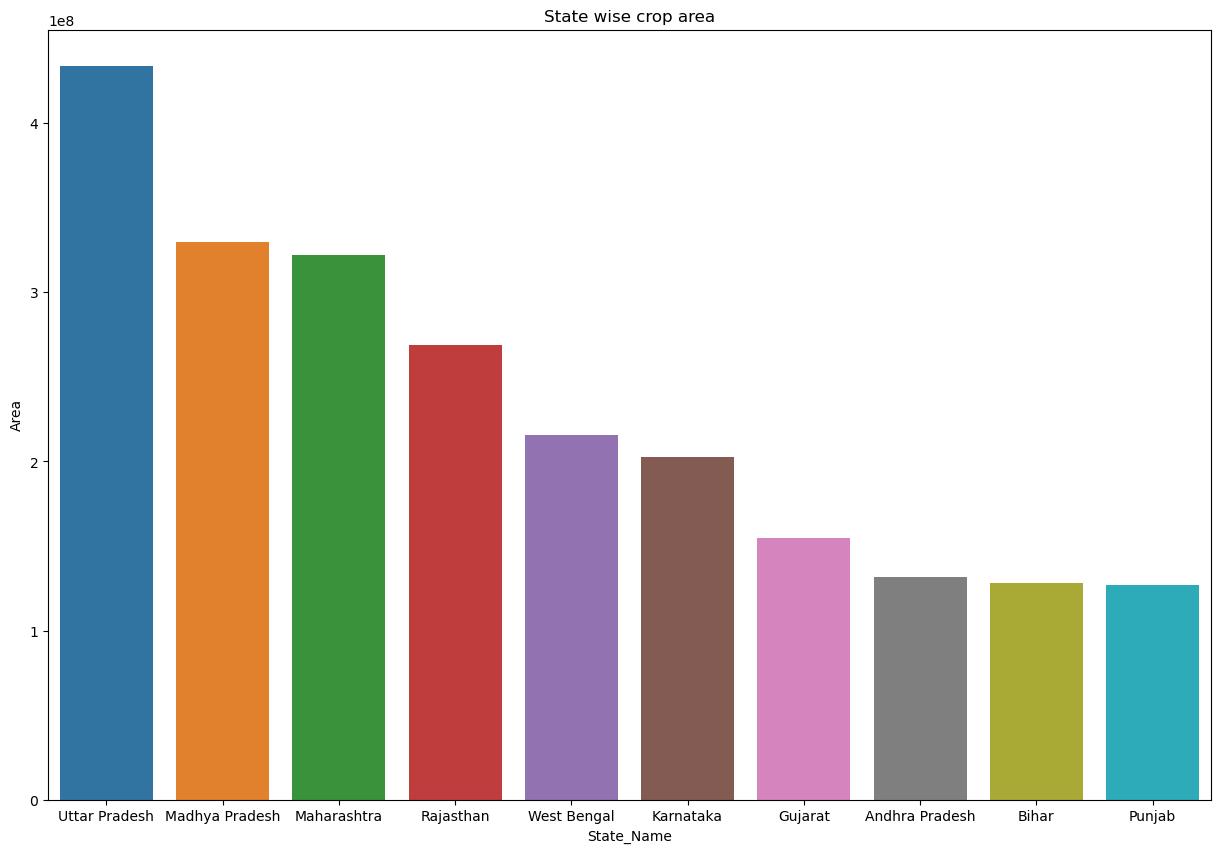

In [35]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='State_Name', y='Area', data=state_wise_area, ax=ax)
ax.set_title('State wise crop area')

* Uttar pradesh as highest area of crop production followed by Madhya Pradesh

## Crop wise total area grown

In [36]:
crop_wise_area = data.groupby(by='Crop')['Area'].sum().reset_index().sort_values(by='Area', ascending=False).head(10)
crop_wise_area

,Crop,Area
95,Rice,7.463186e+08
119,Wheat,4.707132e+08
33,Cotton(lint),1.565579e+08
6,Bajra,1.409679e+08
48,Jowar,1.376593e+08
105,Soyabean,1.354501e+08
59,Maize,1.214845e+08
41,Gram,1.181906e+08
43,Groundnut,1.027078e+08
92,Rapeseed &Mustard,8.657132e+07


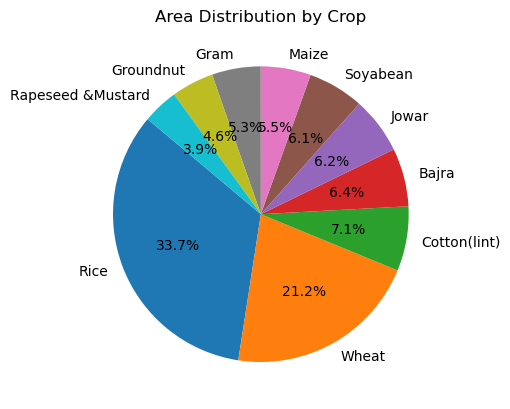

In [37]:
plt.pie(crop_wise_area['Area'], labels=crop_wise_area['Crop'], autopct='%1.1f%%', startangle=140)
plt.title('Area Distribution by Crop')
plt.show()

* Rice as a highest area of production in India followed by wheat due to its suitability for the country's diverse climatic conditions, extensive water resources, and staple food preferences.

In [38]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

## Season wise area and production of crop grown

In [39]:
season_wise_area = data.groupby(by='Season')[['Area', 'Production']].sum().reset_index().sort_values(by='Area', ascending=False)
season_wise_area

,Season,Area,Production
1,Kharif,1.403367e+09,4.029970e+09
2,Rabi,9.479091e+08,2.051688e+09
4,Whole Year,2.546494e+08,1.344248e+11
5,Winter,2.195979e+08,4.345498e+08
3,Summer,7.531411e+07,1.706579e+08
0,Autumn,4.806909e+07,6.441377e+07


* Kharif season as highest area and production of crops

# Feature Engineering- New Feature Creation

* Grouping the area by state and associate it with the respective zones and grouping crops by their categories

In [40]:
union_territory = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']
southern_zone = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
northern_zone = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
northeastern_zone = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
eastern_zone = ['Bihar', 'Jharkhand', 'Odisha',  'West Bengal']
western_zone = ['Rajasthan' , 'Goa','Gujarat','Maharashtra']
central_zone = [ 'Chhattisgarh','Madhya Pradesh']

In [41]:
def get_zonal_names(row):
    if row['State_Name'].strip() in northern_zone:
        val = 'Northern zone'
    elif row['State_Name'].strip()  in southern_zone:
        val = 'Southern Zone'
    elif row['State_Name'].strip()  in eastern_zone:
        val = 'Eastern Zone'
    elif row['State_Name'].strip()  in western_zone:
        val = 'Western Zone'
    elif row['State_Name'].strip()  in central_zone:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in northeastern_zone:
        val = 'Northestern Zone'
    elif row['State_Name'].strip()  in union_territory:
        val = 'Union territory'
    else:
        val = 'No Value'
    return val

data['Zones'] = data.apply(get_zonal_names, axis=1)
data['Zones'].unique()

array(['Union territory', 'Southern Zone', 'Northestern Zone',
       'Eastern Zone', 'Northern zone', 'Central Zone', 'Western Zone'],
      dtype=object)

In [42]:
data['Crop'] = data['Crop'].str.strip().str.lower()

In [43]:
crop=data['Crop']
def cat_crop(crop):
    for i in ['rice', 'maize', 'wheat', 'barley', 'varagu', 'other cereals & millets', 'ragi', 'small millets',
              'bajra', 'jowar', 'paddy', 'total foodgrain', 'jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['moong', 'urad', 'arhar/tur', 'peas & beans', 'masoor', 
                           'other kharif pulses', 'other misc. pulses', 'ricebean (nagadal)', 'rajmash kholar', 
                           'lentil', 'samai', 'blackgram', 'korra', 'cowpea(lobia)', 'other rabi pulses', 
                           'other kharif pulses','other rabi pulses' 'peas & beans (pulses)', 'pulses total', 'gram','moong(green gram)']:
        if crop==i:
            return 'Pulses'
    for i in  ['peas (vegetable)','turnip', 'peas', 'beet root', 'carrot', 'yam', 'ribed guard', 'ash gourd', 'pump kin',
                               'redish', 'snak guard', 'bottle gourd', 'bitter gourd', 'cucumber', 
               'drum stick', 'cauliflower', 'beans & mutter(vegetable)', 'cabbage', 'bhindi', 'tomato', 
               'brinjal', 'khesari', 'sweet potato', 'potato', 'onion', 'tapioca', 'colocosia','other vegetables','peas (vegetable)']:

        if crop==i:
            return 'Vegetables'
    for i in ['bean', 'lab-lab', 'moth', 'guar seed', 'soyabean', 'horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['peach', 'apple', 'litchi', 'pear', 'plums', 'ber', 'sapota', 'lemon', 'pome granet', 
               'other citrus fruit', 'water melon', 'jack fruit', 'grapes', 'pineapple', 
               'orange', 'pome fruit', 'citrus fruit', 'other fresh fruits', 'mango', 'papaya', 'coconut', 'banana']:
        if crop==i:
                return 'Fruits'
    for i in ['perilla', 'ginger', 'cardamom', 'black pepper', 'dry ginger', 'garlic', 'coriander', 'turmeric', 'dry chillies', 'cond-spcs other']:
        if crop==i:
            return 'Spices'
    for i in ['other fibres', 'kapas', 'jute & mesta', 'jute', 'mesta', 'cotton(lint)', 'sannhamp']:
        if crop==i:
            return 'Fibres'
    for i in ['arcanut (processed)', 'atcanut (raw)', 'cashewnut processed', 'cashewnut raw', 'cashewnut', 'arecanut', 'groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds', 'safflower', 'niger seed', 'castor seed', 'linseed', 'sunflower', 'rapeseed &mustard', 'sesamum', 'oilseeds total']:
        if crop==i:
            return 'Oilseeds'
    for i in ['tobacco', 'coffee', 'tea', 'sugarcane', 'rubber']:
        if crop==i:
            return 'Commercial'

data['Cat_crop']=data['Crop'].apply(cat_crop)

In [44]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,Cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,arecanut,1254.0,2000.0,Union territory,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,other kharif pulses,2.0,1.0,Union territory,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,rice,102.0,321.0,Union territory,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,banana,176.0,641.0,Union territory,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,cashewnut,720.0,165.0,Union territory,Nuts


### Continued Exploratory data analysis

In [46]:
zone_wise_prod = data.groupby(by='Zones')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
zone_wise_prod

,Zones,Production
4,Southern Zone,1.284797e+11
2,Northern zone,4.365489e+09
6,Western Zone,2.575008e+09
3,Northestern Zone,2.165305e+09
1,Eastern Zone,1.936070e+09
5,Union territory,1.104796e+09
0,Central Zone,5.497926e+08


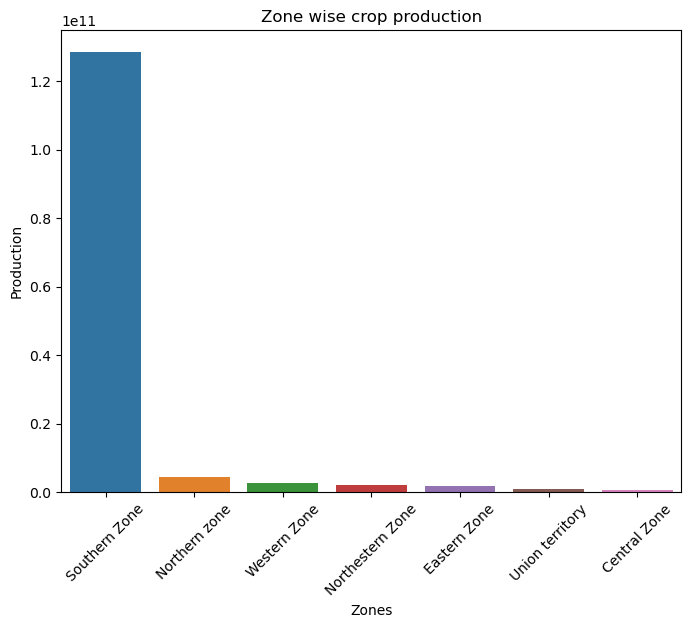

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Zones', y='Production', data=zone_wise_prod, ax=ax)
ax.set_title('Zone wise crop production')
plt.xticks(rotation=45)
plt.show()

* Southern zone is a highest producing zone

In [48]:
zone_wise_area = data.groupby(by='Zones')['Area'].sum().reset_index().sort_values(by='Area', ascending=False)
zone_wise_area

,Zones,Area
6,Western Zone,7.471061e+08
2,Northern zone,6.879245e+08
4,Southern Zone,5.429458e+08
1,Eastern Zone,4.629271e+08
0,Central Zone,4.127226e+08
3,Northestern Zone,9.399834e+07
5,Union territory,1.282334e+06


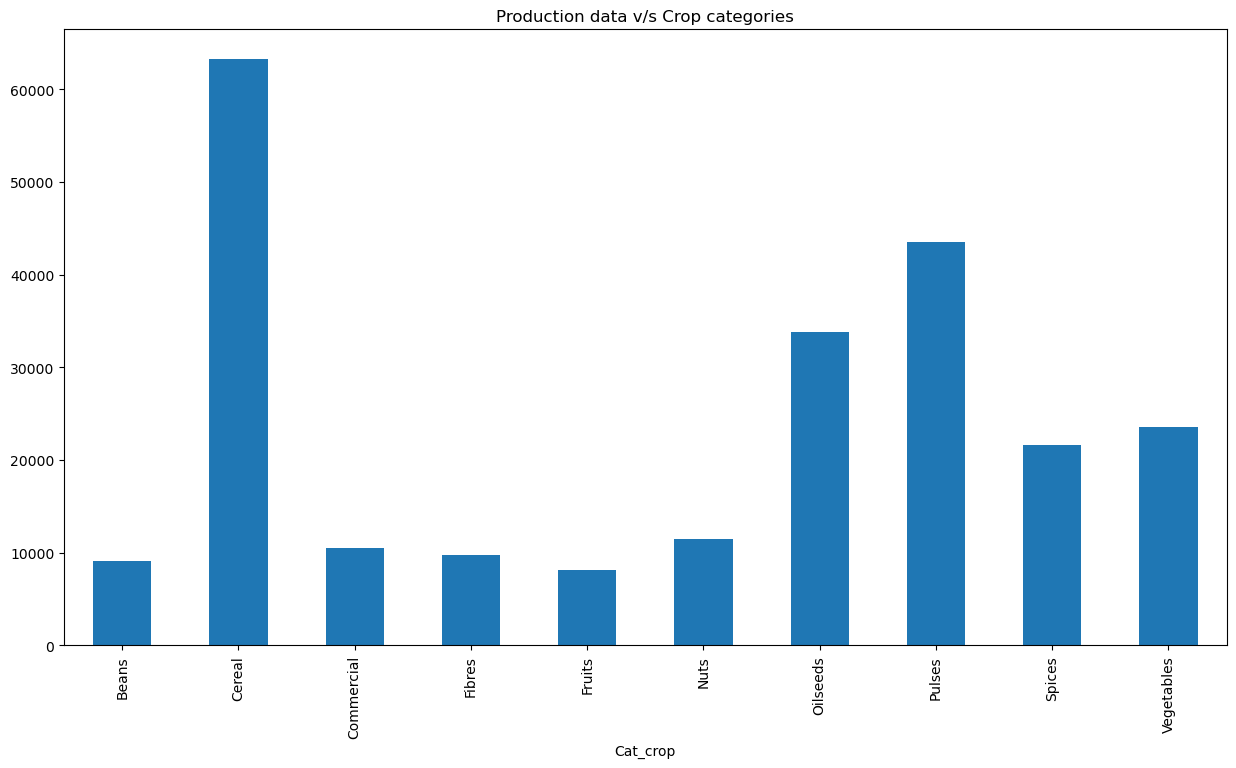

In [49]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
data.groupby("Cat_crop")["Production"].agg("count").plot.bar()
plt.title("Production data v/s Crop categories")
plt.show()

In [50]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production', 'Zones', 'Cat_crop'],
      dtype='object')

* Cereals pulses and oil seed are the top producing crop categories

# Summary: Indian Agriculture Exploratory Data Analysis

This exploratory data analysis (EDA) provides insights into the Indian agriculture sector by examining various data aspects related to crop production, area, and seasonal patterns. 

The analysis covers:

### Data Overview:

Dataset: Includes information on crop production, area harvested, and seasonal variations across different states and districts over 1997 to 2015 in India.
Columns: Key columns include State_Name, District_Name, Crop_year, Season, Crop, Area, Production

### Agricultural Zones and Categories:

Zones: The dataset is categorized into different zones (e.g., Union Territory, South Zone, NE Zone, East Zone, North Zone, Central Zone, West Zone) based on the states.
Categories: Crops are grouped into categories such as Cereal, Pulses, Fruits, Beans, Vegetables, Spices, Fibres, Nuts, Oilseeds, and Commercial crops.

### Data Cleaning:

Missing Values: Identified and handled missing values in critical columns.
Handling duplicates: No duplicated data was found
Normalization: Standardized crop names to lower case to ensure consistency.

### Data Analysis:

Production Trends: Examined and Visualized year, state, crop, zone, area, season and Crop Categories -wise production
Trend follow like this 
1. Kerala as a highest crop production followed by Andra Pradesh 
2. Coconut as a highest crop production, as the weight of the coconut weighs more followed by Sugarcane
3. 2011 as highest production followed by 2013
4. Rice as a highest area of production in India followed by wheat due to its suitability for the country's diverse climatic conditions, extensive water resources, and staple food preferences.
5. Kharif season as highest area and production of crops
6. Southern zone is a highest producing zone
7. Cereals, pulses and oil seed are the top producing crop categories

Seasonal Patterns: Kharif season as highest area and production of crops

State-wise Analysis: Kerala as a highest crop production followed by Andra Pradesh  and Uttar pradesh as highest area of crop production followed by Madhya Pradesh

### Data Visualizations:

Bar Plots: Displayed top crops by production and area using horizontal and vertical bar plots.
Pie Charts: Showed the distribution of crop categories to visualize the proportion of each category.
Histograms: Illustrated the distribution of various numeric attributes, such as crop production.

## Insights:

Kerala leads in crop production, primarily due to its favorable tropical climate that supports high coconut yields, with Andhra Pradesh following closely due to its significant sugarcane production. The years 2011 and 2013 stand out as peak production years, likely attributed to optimal weather conditions and effective agricultural practices. Rice dominates the area of crop production in India, benefiting from its adaptability to diverse climatic conditions and extensive water resources, with wheat being a close second. The Kharif season shows the highest crop area and production, driven by abundant monsoon rains that are ideal for crop growth. The Southern zone emerges as the top agricultural producer, supported by its favorable climate and irrigation infrastructure. Cereals, pulses, and oilseeds are the top crop categories, reflecting their crucial roles in food security and nutrition.